In [152]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/openintro-possum/possum.csv


In [153]:
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('/kaggle/input/openintro-possum/possum.csv')
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


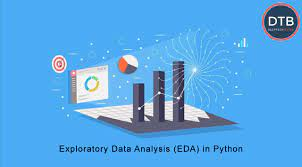

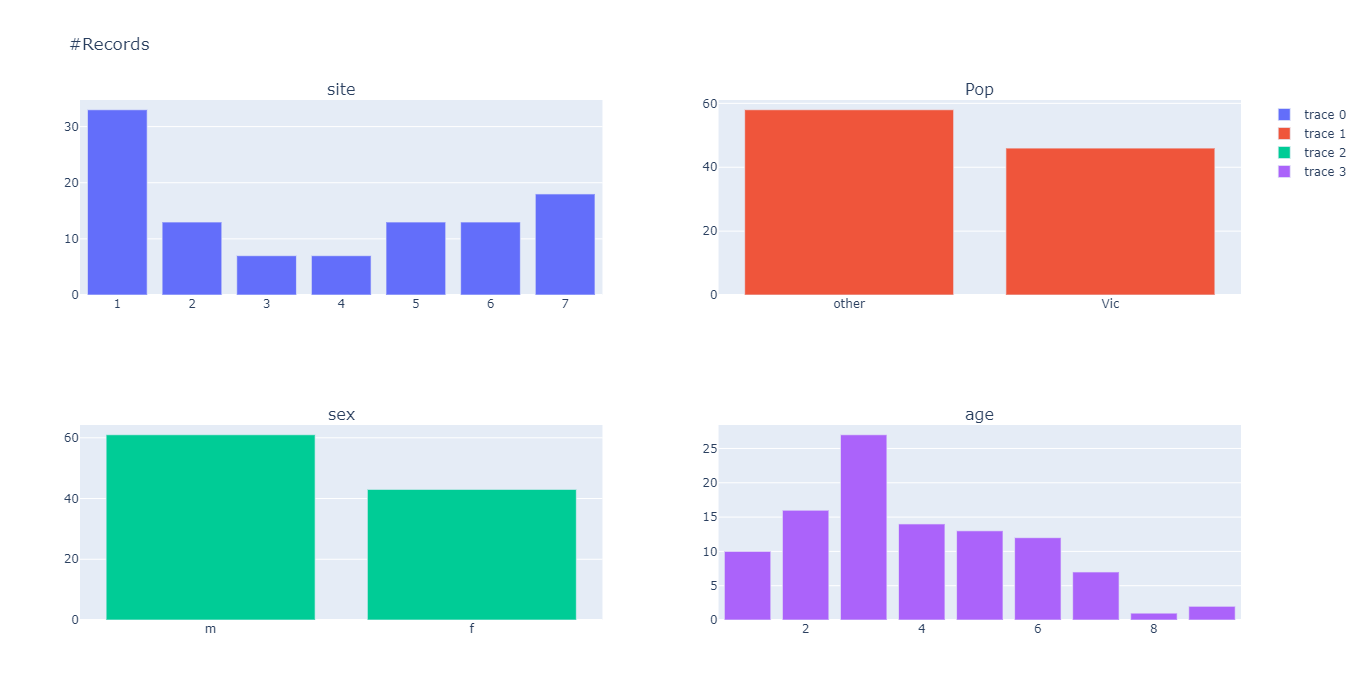

In [154]:
##  Lets Find basic, info about Our data
for i in df[['site','Pop','sex','age']]:
    exec(f"df_{i} = pd.DataFrame(df[i].value_counts())")
    
    
fig = make_subplots(rows=2, cols=2,
                   subplot_titles=("site", "Pop", "sex", "age"))

fig.add_trace(
    go.Bar(x=df_site.index, y=df_site['site']),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=df_Pop.index, y=df_Pop['Pop']),
    row=1, col=2
)
fig.add_trace(
    go.Bar(x=df_sex.index, y=df_sex['sex']),
    row=2, col=1
)
fig.add_trace(
    go.Bar(x=df_age.index, y=df_age['age']),
    row=2, col=2
)

fig.update_layout(height=700, width=1000, title_text="#Records")
fig.show()

* Site : Majority of records are for 0
* Pop : Other has 26% more records than Vic
* Sex : Male dominates here
* Age : 3y followed by 2 and 4 yrs

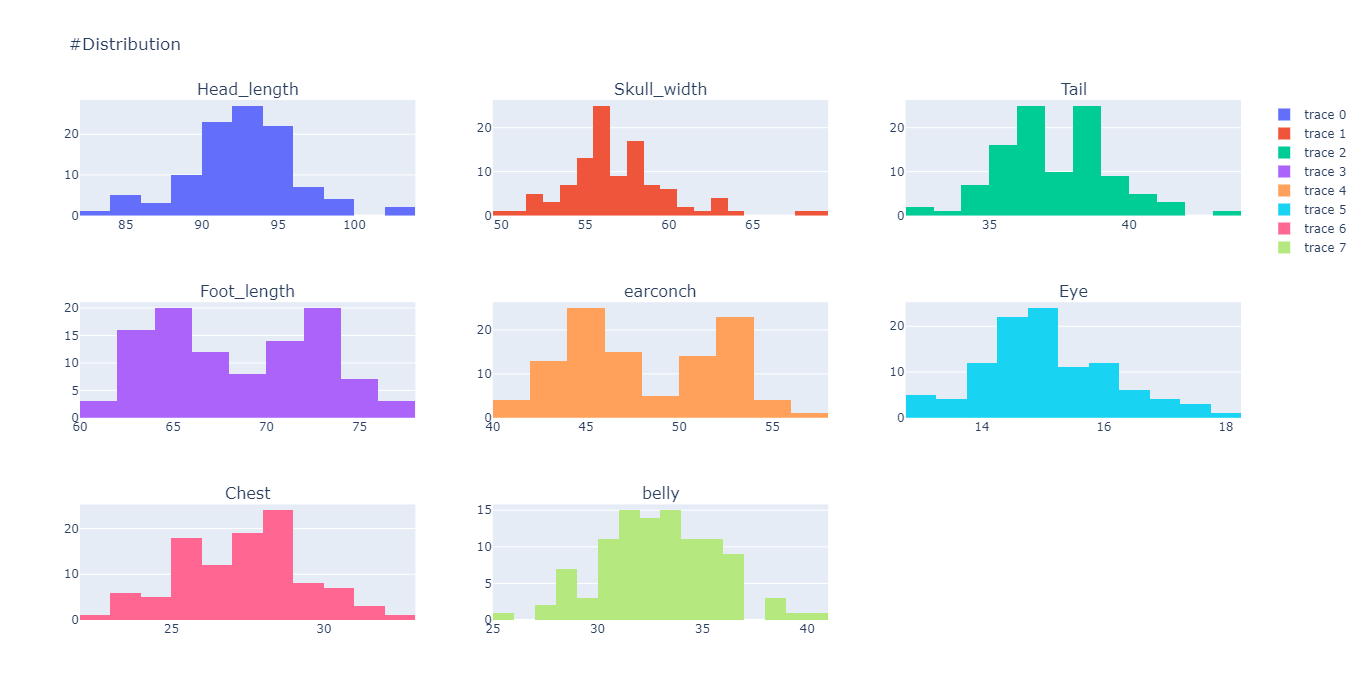

In [155]:

fig = make_subplots(rows=3, cols=3,
                   subplot_titles=("Head_length", "Skull_width", "Tail", "Foot_length","earconch",
                                  "Eye","Chest","belly"))

fig.add_trace(
    go.Histogram(x=df["hdlngth"]),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=df["skullw"]),
    row=1, col=2
)
fig.add_trace(
    go.Histogram(x=df["taill"]),
    row=1, col=3
)
fig.add_trace(
    go.Histogram(x=df["footlgth"]),
    row=2, col=1
)
fig.add_trace(
    go.Histogram(x=df["earconch"]),
    row=2, col=2
)
fig.add_trace(
    go.Histogram(x=df["eye"]),
    row=2, col=3
)
fig.add_trace(
    go.Histogram(x=df["chest"]),
    row=3, col=1
)
fig.add_trace(
    go.Histogram(x=df["belly"]),
    row=3, col=2
)

fig.update_layout(height=700, width=1000, title_text="#Distribution")
fig.show()

* Head_Length our dependent variable is pretty has good distribution.
* Tail, Foot length, Earconch has somewhat same distribtuion with two different Peaks, May be it vary as per Sex or Age
* Eye has more tail towards right
* Chest and Belly seems ok
* Skull Width distritbution is most noisy one.

* **Lets See at their box plot to find Outlier Points**

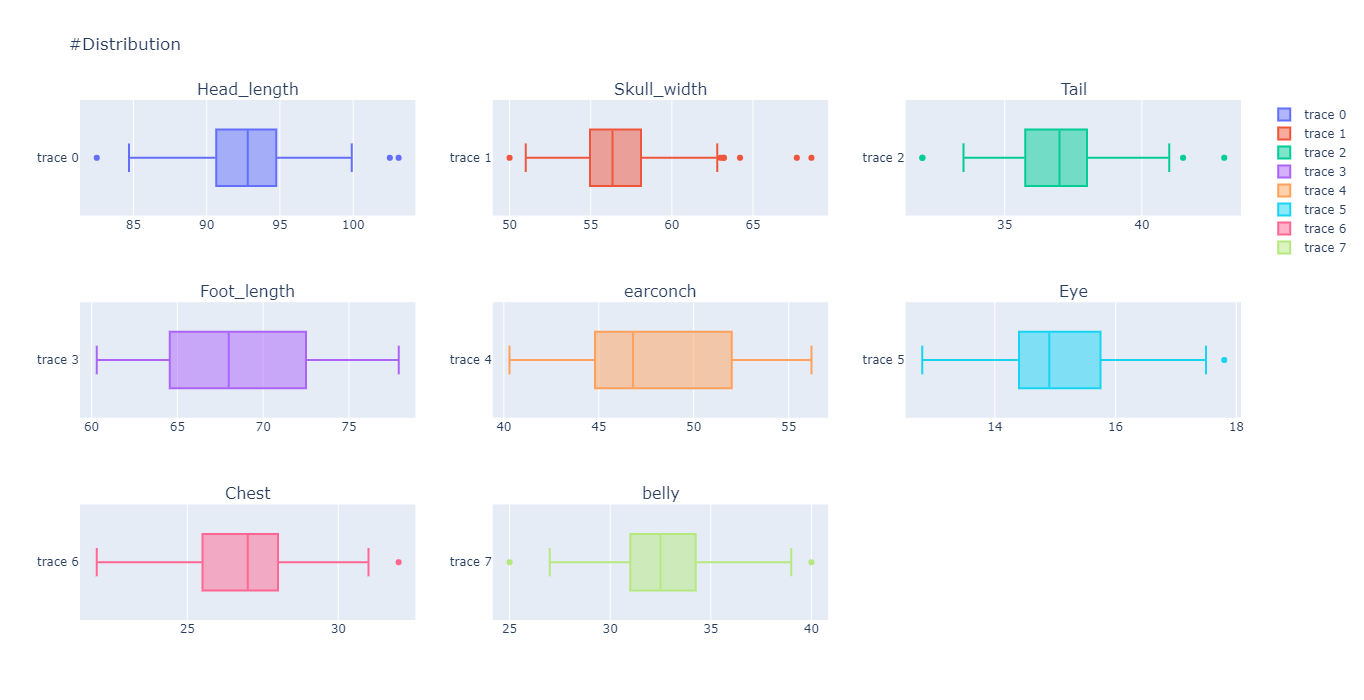

In [156]:

fig = make_subplots(rows=3, cols=3,
                   subplot_titles=("Head_length", "Skull_width", "Tail", "Foot_length","earconch",
                                  "Eye","Chest","belly"))

fig.add_trace(
    go.Box(x=df["hdlngth"]),
    row=1, col=1
)

fig.add_trace(
    go.Box(x=df["skullw"]),
    row=1, col=2
)
fig.add_trace(
    go.Box(x=df["taill"]),
    row=1, col=3
)
fig.add_trace(
    go.Box(x=df["footlgth"]),
    row=2, col=1
)
fig.add_trace(
    go.Box(x=df["earconch"]),
    row=2, col=2
)
fig.add_trace(
    go.Box(x=df["eye"]),
    row=2, col=3
)
fig.add_trace(
    go.Box(x=df["chest"]),
    row=3, col=1
)
fig.add_trace(
    go.Box(x=df["belly"]),
    row=3, col=2
)

fig.update_layout(height=700, width=1000, title_text="#Distribution")
fig.show()

* As thought, Skull length has good outlier points, for this excercise we will remove it, Thought i wont suggest that 

In [157]:
dv = 'hdlngth'
df= df.dropna()
cat_var = ['Pop','sex']

##############################################
df[cat_var[0]] = df[cat_var[0]].map({'Vic':0,
                     'other':1})

df[cat_var[1]] = df[cat_var[1]].map({'m':1,
                     'f':0})

In [158]:
####### Right Now we will remove outlier point from Head and SKull only
outlier_col = ['hdlngth','skullw']
df = df[df['hdlngth']<100]
df = df[df['skullw']<67]

##########################################################################
* Here Head lenght, skull, earconch, eye are in mm
* Foot lenght no info from data set
* total Lenght , chest , belly , tail in cm

##########################################################################
* But for our analysis, we are going with Pop, Sex, skull, Reason is 
    High Multicollinearity
    * As per my experince, here High business understanding helps alot,
    * Like here Keeping skull length itself will be good esitmator to 
    * identify head length to great extent**

In [159]:
import seaborn as sns
df.corr()

vif_df = df.drop(columns=['case','hdlngth','totlngth','taill','footlgth','chest','earconch','belly','eye','site','age'])
vif = pd.DataFrame()
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif['VIF'] = [variance_inflation_factor(vif_df.values, i) for i in range(vif_df.shape[1])]
vif['variable'] = vif_df.columns


### We are going with Pop, Sex, age, skullw for out analysis
Model_df = df[['Pop','sex','skullw',dv]]

## let do Log transformation
## To capture non linearity of data.


# Model_df['skullw'] = np.log(Model_df['skullw'])
# Model_df['age'] = np.log(Model_df['age'])
# Model_df[dv] = np.log(Model_df[dv])

idv = ['Pop','sex','skullw']

## As our Model Data Is ready, Lets Use 

## Lets First Find with Linear Regression how is the coefficient looks like

In [160]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

# Linear Regression to verify implementation
from sklearn.linear_model import LinearRegression

# Scipy for statistics
import scipy

# PyMC3 for Bayesian Inference
import pymc3 as pm

In [161]:
# Create the model and fit on the data
lr = LinearRegression()
lr.fit(Model_df[idv],Model_df[dv])
print('Intercept from library:', lr.intercept_)
coeff_df = pd.DataFrame()
coeff_df['columns'] = idv
coeff_df['coef'] = lr.coef_
Model_df['lr_pred'] = [lr.intercept_] + lr.coef_[1]*Model_df['sex'] \
                        + lr.coef_[0]*Model_df['Pop'] + lr.coef_[2]*Model_df['skullw']
 
coeff_df

Intercept from library: 37.39006680111218


,columns,coef
0,Pop,-0.740538
1,sex,0.181857
2,skullw,0.979112


## If we infer the above coeff
* as We have mapped 0 to female, so here Female Head length is small than Male head Length.
* Age Coefficent is very less, we can drop it as well
* Skullw, if we increase Skullw by 1 unit the head length will increase by 0.9, we will look into it as well

In [162]:

## Lets Look Head Length Distribution by Gender term

#########################################################
#########################################################
#########################################################

# Headh length of Male(1) is 1 % higher than Female (0)
print('#########################################################')
print(Model_df.groupby(['sex'],as_index=False)['hdlngth'].mean()['hdlngth'])

## if i see this data, if our flag is 1 our head length 
##    should increase by  0.55 approx

## We can see in out lr coeff its value  0.181857 , we will optimize it as well


#########################################################
#########################################################

print('#########################################################')
Model_df.groupby(['Pop'],as_index=False)['hdlngth'].mean()['hdlngth']

## if i see this data, if our flag is other(1) our other   # Vic = 0, other = 1
##    should increase by 0.62 approx

## We can see in out lr coeff its value  -0.740538 , we will optimize it as well


#########################################################
0    92.178049
1    92.732143
Name: hdlngth, dtype: float64
#########################################################


0    92.854762
1    92.225455
Name: hdlngth, dtype: float64

In [163]:
##################################################
## Lets Talk about skull coeff 

## If we go with common sense, our head length will be always greater than our skull length,
##   as our head length ~ skull length + mouth + nose or in short it will be greater than our skull length


## But if we look at coeff, it is if we increase our skull length, out head length will increase by only half,
## that does not make sense as per what i thinks, Lets look at data


## Lets take Head length to Skull length Ratio by its meadian value
print(df[dv].median()/df['skullw'].median())

## Ratio is 1.64 so , we can make it out from here,
##  if skull is 1 and then head length has to be around 1.6



1.6483126110124333


* So from above Two cell, what we did we Find our Initial Priors, we will be using in Bayesian algorithm,
* Most important in Real work, it is refered to Business understanding.
* Lets Start with Bayesian Apprach to find tune our Coeff

* Out Initial Priors are for Age and Skullw, lets define them
    * Sex : 0.554094 approx
    * Skullw : 1.64 approx
    * Pop : 0.62 approx
    * we will keep priors distribution around them for these two variable
    * for rest varibale we are not keeping any priors, lets model choose automatically

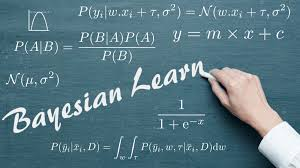

In [164]:
with pm.Model() as linear_model:
    # Intercept
    intercept = pm.Normal('Intercept', mu = 1, sd = 2)
    
    # Pop_Slope 
    Pop_slope = pm.Normal('Pop_slope', mu = 0.6, sd = 0.01)
    
    # sex_Slope 
    sex_slope = pm.Normal('sex_slope', mu = 0.5, sd = 0.01)
    
    # skullw_Slope 
    skullw_Slope = pm.Normal('skullw_Slope', mu = 1.5, sd = 0.01 )
    
    
    # Standard deviation
    sigma = pm.HalfNormal('sigma', sd = 10)
    
    # Estimate of Formulae
    mean = intercept + Pop_slope*Model_df['Pop'] + sex_slope*Model_df['sex'] + skullw_Slope*Model_df['skullw']
    
    # Observed values
    Y_obs = pm.Normal('Y_obs', mu = mean, sd = sigma, observed = Model_df[dv])
    
    # Sampler
    step = pm.NUTS()

    # Posterior distribution
    linear_model = pm.sample(2000,chains=2,tune=1000)

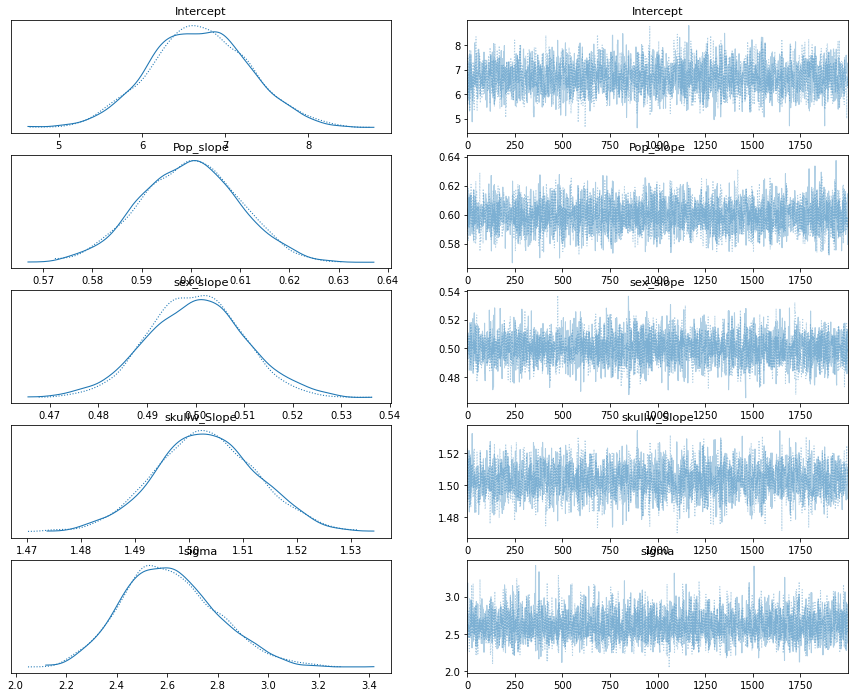

In [165]:
pm.traceplot(linear_model, figsize = (15, 12));

### Coefficient

In [166]:
##########################
Result = pd.DataFrame(pm.summary(linear_model))
Result['weights'] = Result.index
Result = dict(zip(Result['weights'],Result['mean']))
Result#['Intercept']

{'Intercept': 6.689,
 'Pop_slope': 0.6,
 'sex_slope': 0.5,
 'skullw_Slope': 1.503,
 'sigma': 2.612}

In [167]:
Model_df['bayesian_pred'] = [Result['Intercept']] + Result['sex_slope']*Model_df['sex'] \
                        + Result['Pop_slope']*Model_df['Pop'] \
                        + Result['skullw_Slope']*Model_df['skullw'] 

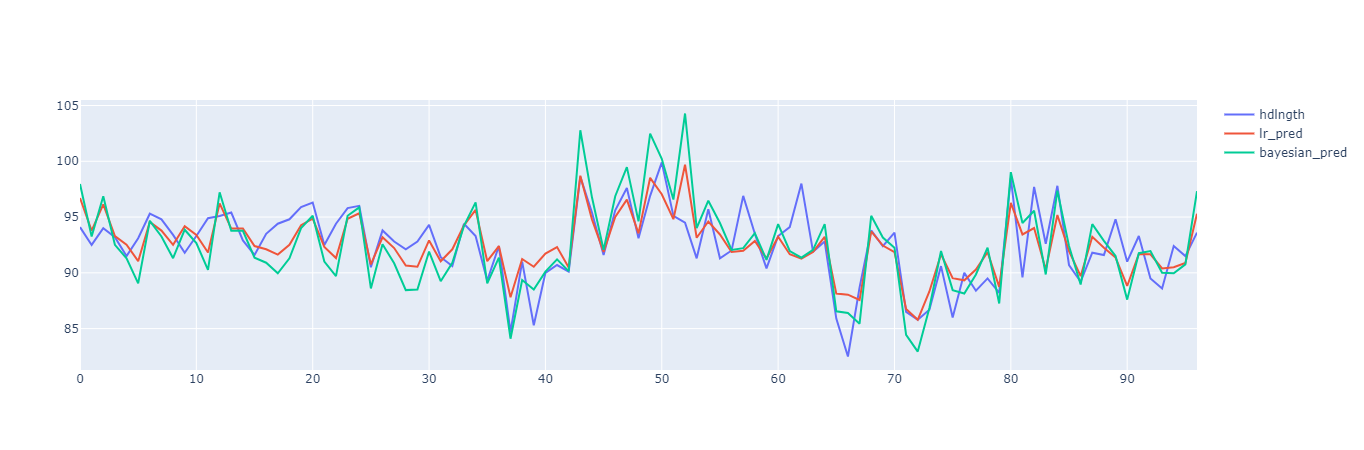

In [168]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=Model_df['hdlngth'],
                    mode='lines',
                    name='hdlngth'))
fig.add_trace(go.Scatter(y=Model_df['lr_pred'],
                    mode='lines',
                    name='lr_pred'))
fig.add_trace(go.Scatter(y=Model_df['bayesian_pred'],
                    mode='lines',
                    name='bayesian_pred'))

fig.show()

In [169]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error

 
print("###################### MAPE ############################")
lr_mape = np.round(mean_absolute_percentage_error(Model_df['hdlngth'], Model_df['lr_pred']),4)
baye_mape = np.round(mean_absolute_percentage_error(Model_df['hdlngth'], Model_df['bayesian_pred']),4)

print(lr_mape,"---", baye_mape)

print("###################### RMSE ############################")
lr_rmse = np.round(mean_squared_error(Model_df['hdlngth'], Model_df['lr_pred'], squared=False),4)
baye_rmse = np.round(mean_squared_error(Model_df['hdlngth'], Model_df['bayesian_pred'], squared=False),4)

print(lr_rmse,"---", baye_rmse)

###################### MAPE ############################
0.017 --- 0.0214
###################### RMSE ############################
2.0581 --- 2.5675


## So what the diff bw LR and Bayesian LR,
## Its all about the way we are assigning coeff, in LR, purely based on Data we are finding point estimates,
## Whereas in Bayesian, we can tune coeff, and found coeff around business accepted range, that make sense.

### If you like please do like and any doubt, please comment it so that i can help you.
### Thanks for reading till end